In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import folium

# US Accidents Exploratory Data Analysis

#Source- Kaggle

#Information about accidents

##can use useful to prevent accidents           



##mention that this does not contain data about NewYork

In [8]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


Download the data

In [9]:
import opendatasets as od
download_url='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


# Prepare data for cleaning

In [10]:
dataset=pd.read_csv(r'C:\Users\miria\OneDrive\GoogleDataAnalytics\Project\US_Accidents_Dec20_updated.csv')

In [11]:
dataset.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [12]:
dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
len(dataset.columns) #Number of columns

47

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [15]:
dataset.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [16]:
numerics=['int16','int32,' ' int64', 'float16', 'float32','float64']
numeric_df=dataset.select_dtypes(include=numerics)
len(numeric_df.columns)

13

# Count Number of missing values

In [17]:
dataset.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

Percentage of Missing values per column


In [18]:
missing_percentages=dataset.isna().sum().sort_values(ascending=False)/len(dataset)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

In [19]:
missing_percentages[missing_percentages != 0] #gives columns which has missing values

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
dtype: float64

In [20]:
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

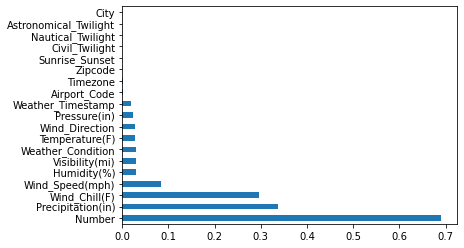

In [21]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use

In [22]:
dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Exploratory Analysis and visualization
Columns we will analyze:
1. City
2.Start_Lat
3.Start_Lng
4.Temperature
5.Weather Condition

# City

In [23]:
dataset.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [24]:
cities=dataset.City.unique()
len(cities)

10658

In [25]:
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown',
       'Freeport', 'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell',
       'Edinburgh', 'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', '

In [26]:
cities_by_accident=dataset.City.value_counts()
cities_by_accident

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Lawtons                             1
American Fork-Pleasant Grove        1
Keyser                              1
Indian Creek                        1
Fort Gay                            1
Name: City, Length: 10657, dtype: int64

In [27]:
cities_by_accident[:20]#Count of first 20 cities

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [28]:
'New York' in dataset.City

False

In [29]:
'NY' in dataset.State

False

<AxesSubplot:>

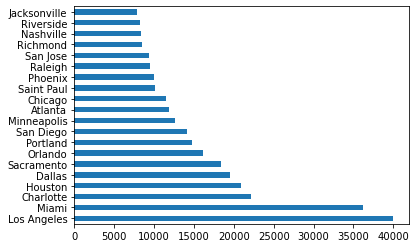

In [30]:
cities_by_accident[:20].plot(kind='barh')

In [31]:
import seaborn as sns

In [32]:
sns.set_style('darkgrid') #to change theme to dark

C:\Users\miria\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

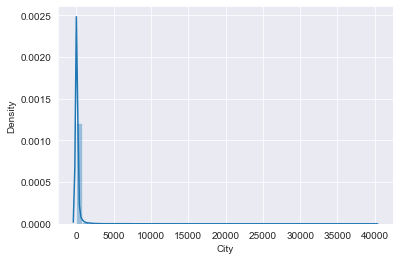

In [41]:
sns.distplot(cities_by_accident)

In [42]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [43]:
len(high_accident_cities)

251

In [44]:
len(low_accident_cities)

10406

C:\Users\miria\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

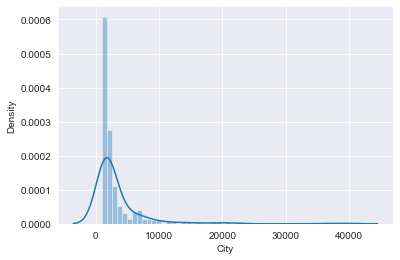

In [45]:
 sns.distplot(high_accident_cities)

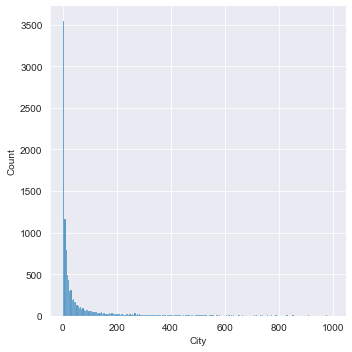

In [46]:
sns.displot(low_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

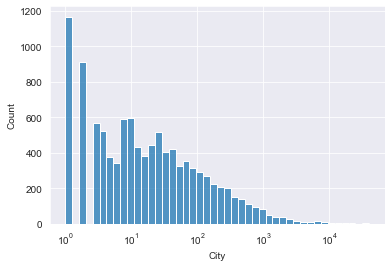

In [47]:
sns.histplot(cities_by_accident,log_scale=True)

In [48]:
cities_by_accident[cities_by_accident==1]

Lund                            1
Deshler                         1
Jakin                           1
Maryland                        1
Stanchfield                     1
                               ..
Lawtons                         1
American Fork-Pleasant Grove    1
Keyser                          1
Indian Creek                    1
Fort Gay                        1
Name: City, Length: 1167, dtype: int64

# Start_Time

In [49]:
dataset.Start_Time[0]

'2016-02-08 00:37:08'

In [50]:
dataset.Start_Time =pd.to_datetime(dataset.Start_Time)

In [51]:
dataset.Start_Time[0].hour

0

In [52]:
dataset.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

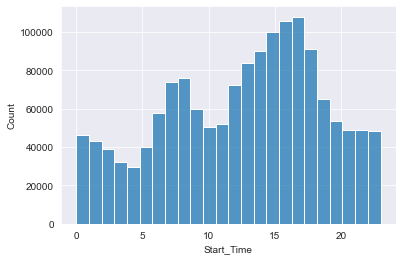

In [53]:
sns.histplot(dataset.Start_Time.dt.hour,bins=24)

C:\Users\miria\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

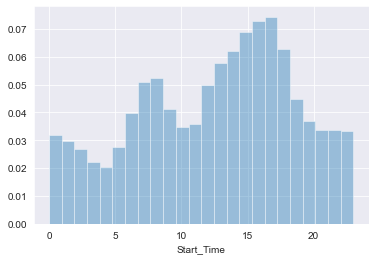

In [54]:
sns.distplot(dataset.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

# - A high percentage of accidents occur between 4pm-7PM and  6am to 10AM 


<AxesSubplot:xlabel='Start_Time'>

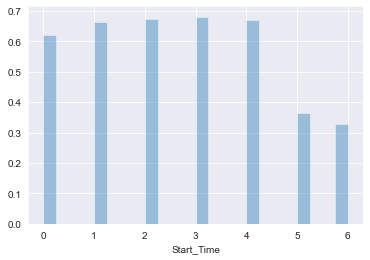

In [55]:
sns.distplot(dataset.Start_Time.dt.dayofweek, bins=24, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays.

In [56]:
dataset.Start_Time[dataset.Start_Time.dt.dayofweek==6]

158       2016-02-14 03:58:33
159       2016-02-14 05:26:58
160       2016-02-14 16:30:40
161       2016-02-14 16:38:40
162       2016-02-14 17:40:17
                  ...        
1513810   2019-08-18 22:48:14
1513811   2019-08-18 23:24:10
1513925   2019-08-18 22:56:56
1513926   2019-08-18 22:56:56
1513965   2019-08-18 22:54:41
Name: Start_Time, Length: 123775, dtype: datetime64[ns]

In [57]:
sundays_Start_Time=dataset.Start_Time[dataset.Start_Time.dt.dayofweek==6]

AttributeError: 'Rectangle' object has no property 'norm_hist'

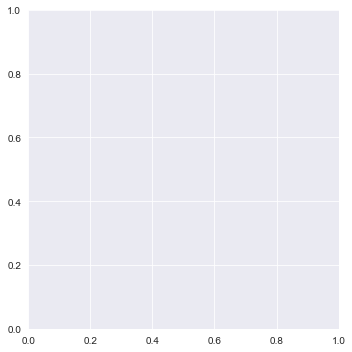

In [58]:
sns.displot(sundays_Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

In [ ]:
df_2019=dataset[dataset.Start_Time.dt.year=='2019']

In [ ]:
df_2019

In [ ]:
dataset.Start_Time

In [ ]:
Year_2019=dataset.Start_Time[dataset.Start_Time==2019]

In [ ]:
Year_2019

In [ ]:
sns.distplot(df_2019.Start_Time.dt.month, bins=24, kde=False, norm_hist=True)

In [59]:
dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<AxesSubplot:ylabel='Station'>

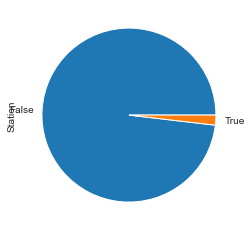

In [60]:
dataset.Station.value_counts().plot(kind='pie')

# Start_Lat and Start_Lng

In [61]:
dataset.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [62]:
dataset.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

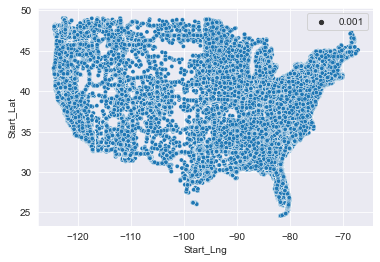

In [63]:
sns.scatterplot(x=dataset.Start_Lng, y=dataset.Start_Lat, size=0.001)

In [64]:
sample_df=dataset.sample(int(0.1 * len(dataset)))

In [65]:
import folium

In [66]:
lat, lon =dataset.Start_Lat[0],dataset.Start_Lng[0]

In [67]:
lat, lon

(40.10891, -83.09286)

In [72]:
for x in dataset[['Start_Lat','Start_Lng']].sample(100).iteritems():
    print(x)

('Start_Lat', 285375     43.277131
1170340    44.054320
848952     38.146427
1112706    44.793820
396383     44.756261
             ...    
832544     35.465920
986395     36.820887
1169884    38.525100
322886     30.502401
54259      41.842611
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 285375    -124.228624
1170340   -123.351687
848952    -122.216553
1112706    -93.239510
396383    -122.422139
              ...    
832544     -97.499650
986395    -121.727697
1169884   -121.407563
322886     -84.329124
54259      -87.991842
Name: Start_Lng, Length: 100, dtype: float64)


In [71]:
map=folium.Map()
for lat, lon in 
marker=folium.Marker((lat,lon))
marker.add_to(map)

In [85]:
sample_df=dataset.sample(int(0.1*len(dataset)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [86]:
from folium.plugins import HeatMap

In [87]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [77]:
zip (list(dataset.Start_Lat), list(dataset.Start_Lng))

In [56]:
#Ask and Answer questions

1. Are there more accidents in warmer or colder area
2. Which states have the highest number of accidents?
3. How about per capita?
4. Does New York Show up in the data? if yes why is the count lower in this most populated cites?
5.Among the top 100 cities in number which states do they belong to most frequently?
6.What time of the day are accidents most frequent in?
7.Which months have the most accidents?
8.What is the trend of accidents year over year? (increasing/decreasing)?
9.When is accidents per unit of traffic higher?



In [ ]:

#Summary and conculsion



1. No data for NewYork

2.Less than 251 cities have more than 1000 accidents

3.Over 1100 cities have reported just one accident 

The number of accident per city decreases exponentially